In [78]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as cp

In [79]:
data_file = "data.txt"

In [80]:
# load data

x = np.loadtxt(data_file)[:, 0]
y = np.loadtxt(data_file)[:, 1]
y_std = np.loadtxt(data_file)[:, 2]

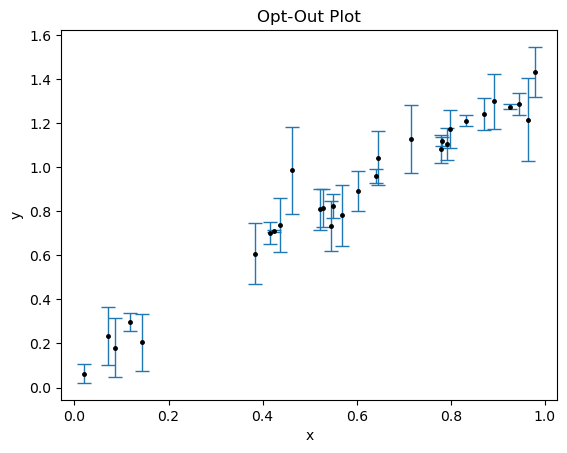

In [81]:
plt.title("Opt-Out Plot")
plt.errorbar(x, y, y_std, linestyle='None', marker='.', markersize=5, mfc='black', ecolor='C0', capsize=5, elinewidth=1, mec='black')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [82]:
# Quadratic Model
def quad(a, b, c, x):
    return a + (b * x) + (c * np.power(x, 2))

In [83]:
# MLE Matrix Calculation
X = np.vstack([np.ones_like(x), x, x**2]).T
Eplison = np.diag(y_std**2)

ep_theta = np.linalg.inv(np.dot(X.transpose(), np.dot(np.linalg.inv(Eplison), X)))
c = np.dot(X.transpose(), np.dot(np.linalg.inv(Eplison), y.T))

theta = np.dot(ep_theta, c)
a_mle = theta[0]
b_mle = theta[1]
c_mle = theta[2]

sigmas = np.sqrt(np.diag(ep_theta))
sigma_a = sigmas[0]
sigma_b = sigmas[1]
sigma_c = sigmas[2]

print("a: ", str(a_mle), "+-", str(sigma_a))
print("b: ", str(b_mle), "+-", str(sigma_b))
print("c: ", str(c_mle), "+-", str(sigma_c))

a:  0.06881083737280276 +- 0.0336861139923506
b:  1.6930694290839652 +- 0.1185097652619035
c:  -0.4208155128799753 +- 0.0934006316341062


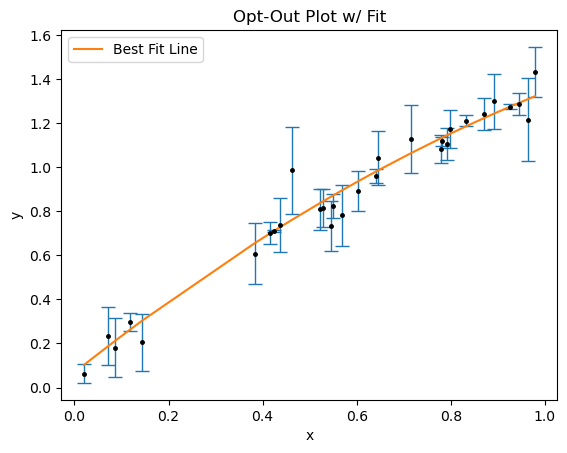

In [84]:
plt.title("Opt-Out Plot w/ Fit")
plt.errorbar(x, y, y_std, linestyle='None', marker='.', markersize=5, mfc='black', ecolor='C0', capsize=5, elinewidth=1, mec='black')
plt.plot(np.sort(x), quad(a_mle, b_mle, c_mle, np.sort(x)), label='Best Fit Line')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()